# JPMC_Task 3_Example Answer

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

/Users/student/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Read in loan data from a CSV file
df = pd.read_csv('Task 3 and 4_Loan_Data.csv')

In [3]:
# Define the variable features
features = ['credit_lines_outstanding', 'debt_to_income', 'payment_to_income', 'years_employed', 'fico_score']

In [4]:
# Calculate the payment_to_income ratio
df['payment_to_income'] = df['loan_amt_outstanding'] / df['income']
    
# Calculate the debt_to_income ratio
df['debt_to_income'] = df['total_debt_outstanding'] / df['income']
X, y = df[features], df['default']

In [5]:
# Regression model
clf = LogisticRegression(random_state=0, solver='liblinear', tol=1e-5, max_iter=10000)
clf.fit(X, y)
print(clf.coef_, clf.intercept_)

[[ 8.18520373  0.54490854  0.01994244 -2.77630853 -0.02418391]] [-0.09162643]


In [6]:
# Use the following code to check yourself
y_pred = clf.predict(X)

fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
print((1.0*(abs(y - y_pred)).sum()) / len(df)) # Means Square Error 
print(metrics.auc(fpr, tpr)) # Area under curve with metrics
print(roc_auc_score(y, clf.predict_proba(X)[:, 1])) # Area under curve with sklearn.metrics

0.0037
0.9925106069101026
0.9999183229635983


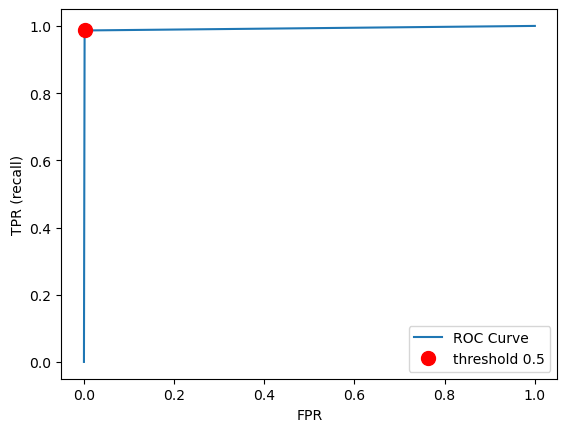

In [7]:
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
default_threshold = np.argmin(np.abs(thresholds - 0.5))

plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");